In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [113]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [115]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [116]:
df=df.drop(["customerID"],axis=1)

In [117]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Fixing MultipleLines columns as "No" & "No phone service" is same yet 3 categories

In [118]:
df["MultipleLines"].value_counts()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


In [119]:
for col in ["MultipleLines","OnlineSecurity",	"OnlineBackup",	"DeviceProtection",	"TechSupport","StreamingTV","StreamingMovies"]:
  df[col]=df[col].map({"No phone service":"No","No":"No","Yes":"Yes"})

In [120]:
df["PaymentMethod"].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


## Column TotalCharges have wrong dtype hence changing to its right dtype also has unknow blank " " entry , removing that too.

In [121]:
df=df.drop(df[df["TotalCharges"]==" "].index,axis=0) ## Removed Blank TotalCharges (" ")

In [122]:
df["TotalCharges"]=df["TotalCharges"].astype("float")

## EDA

<Axes: xlabel='gender', ylabel='SeniorCitizen'>

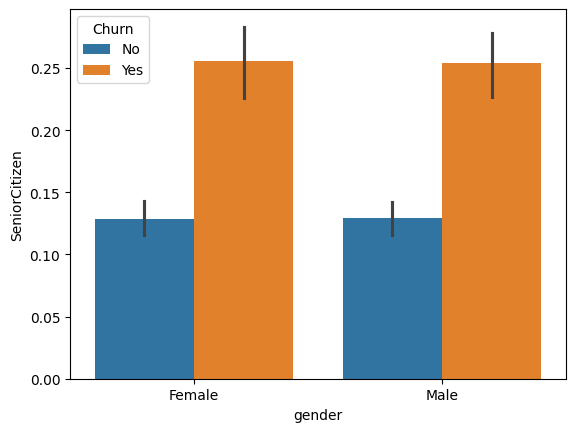

In [123]:
sns.barplot(data=df,y="SeniorCitizen",x="gender",hue="Churn")

In [124]:
df["TechSupport"].value_counts()

,count
TechSupport,
No,3472
Yes,2040


<Axes: xlabel='Churn'>

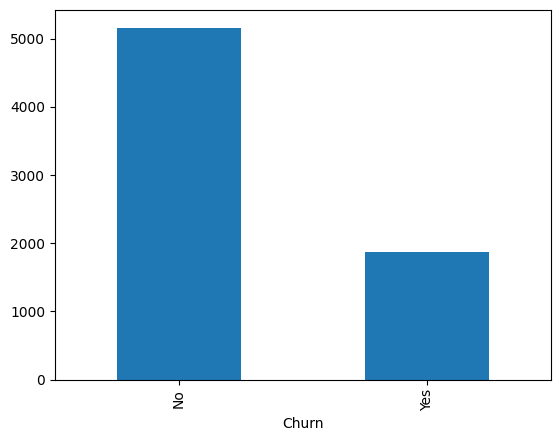

In [125]:
df["Churn"].value_counts().plot(kind="bar")
## Data is little unbalanced

## One-Hot Encoding

In [126]:
df=pd.get_dummies(df,drop_first=True)

In [127]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [128]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,True,...,False,False,False,False,False,True,False,True,False,True


In [129]:
X=df.drop(["Churn_Yes"],axis=1)
y=df["Churn_Yes"].copy()

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [131]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

## Predicting which model would get best result :
- I believe best model will be RandomForest Model, because the columns are in type of questions & answer and numericals columns can be done on threshold based.
- Other simple tree based models can also work fine based on same reasoning as above.

## Models in set: Logistic Regression
- Linear Discriminant Analysis (LDA)
- Quadratic Discriminant Analysis (QDA)
- Decision Tree
- Random Forest
- Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost)
- AdaBoost
- K‑Nearest Neighbors (KNN)
- Support Vector Machine (SVM), including Kernel SVM
- Naive Bayes (Gaussian, Multinomial, Bernoulli variants)
- Bayesian Networks (more general graphical models)
- MLP

## Base Models

In [132]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model=LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)

In [133]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
def eval_model(y_pred,y_test):
  print(accuracy_score(y_pred,y_test))                ## LDA
  print(classification_report(y_pred,y_test))
eval_model(y_pred,y_test)

0.7933649289099526
              precision    recall  f1-score   support

       False       0.88      0.84      0.86      1617
        True       0.55      0.63      0.59       493

    accuracy                           0.79      2110
   macro avg       0.72      0.74      0.72      2110
weighted avg       0.80      0.79      0.80      2110



In [134]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="gini")  ## Decision Tree Classifier
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [135]:
eval_model(y_pred,y_test)

0.728909952606635
              precision    recall  f1-score   support

       False       0.80      0.82      0.81      1511
        True       0.52      0.49      0.51       599

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.72      0.73      0.73      2110



In [136]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, criterion="gini")      ## Random Forest Classifier
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [137]:
eval_model(y_pred,y_test)

0.781042654028436
              precision    recall  f1-score   support

       False       0.89      0.82      0.86      1679
        True       0.47      0.61      0.53       431

    accuracy                           0.78      2110
   macro avg       0.68      0.72      0.70      2110
weighted avg       0.81      0.78      0.79      2110



In [138]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=50)       ## AdaBoost Classifier
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [139]:
eval_model(y_pred,y_test)

0.7928909952606635
              precision    recall  f1-score   support

       False       0.91      0.83      0.87      1700
        True       0.48      0.65      0.55       410

    accuracy                           0.79      2110
   macro avg       0.69      0.74      0.71      2110
weighted avg       0.82      0.79      0.80      2110



In [140]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [141]:
eval_model(y_pred,y_test)

0.7706161137440758
              precision    recall  f1-score   support

       False       0.89      0.82      0.85      1687
        True       0.45      0.59      0.51       423

    accuracy                           0.77      2110
   macro avg       0.67      0.70      0.68      2110
weighted avg       0.80      0.77      0.78      2110



In [142]:
from sklearn.svm import SVC
model=SVC(kernel="poly",C=1,degree=3)       ## Support Vector Classifier
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [143]:
eval_model(y_pred,y_test)

0.7341232227488151
              precision    recall  f1-score   support

       False       1.00      0.73      0.85      2110
        True       0.00      0.00      0.00         0

    accuracy                           0.73      2110
   macro avg       0.50      0.37      0.42      2110
weighted avg       1.00      0.73      0.85      2110



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [144]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |
 |  C-Support Vector Classification.
 |
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |
 |  The multiclass support is handled according to a one-vs-one scheme.
 |
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `